
# Faceting in Two Directions


In the this [section](https://github.com/A2Amir/Data-Visualization-in-Data-Science-Process/blob/master/Code/Faceting.ipynb), you saw how FacetGrid could be used to subset the dataset across levels of a categorical variable, and then create one plot for each subset or you saw in this [section](https://github.com/A2Amir/Data-Visualization-in-Data-Science-Process/blob/master/Code/Encoding%20via%20Color%20.ipynb) how to facet bivariate plots to create a multivariate visualization.


FacetGrid also allows for faceting a variable not just by columns, but also by rows. We can set one categorical variable on each of the two facet axes for one additional method of depicting multivariate trends

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
sedan_classes = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df.VClass = df.VClass.astype(vclasses)
df['trans_type'] = df.trans.apply(lambda x: x.split()[0])
df.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


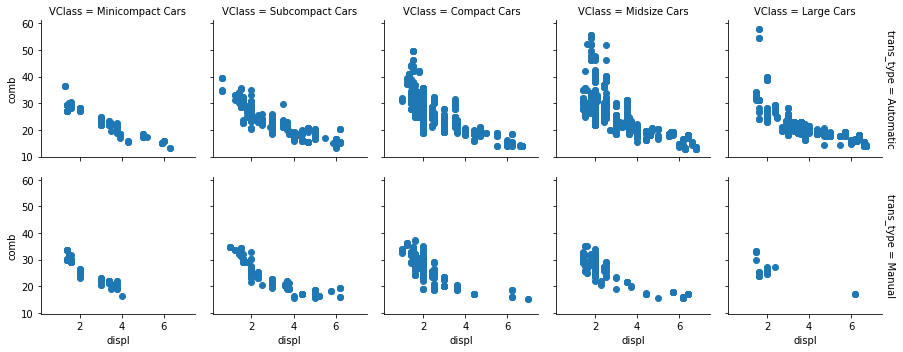

In [4]:
g = sb.FacetGrid(data=df, col='VClass', row='trans_type', size=2.5, margin_titles=True)
g.map(plt.scatter, 'displ', 'comb')

Setting **margin_titles = True** means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. This is a boon, since the default plot titles are usually too long.